C:\Users\amarcosv\AppData\Local\Temp\ipykernel_59768\4022827199.py:29: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4, bottom=0.2)
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_59768\4022827199.py:44: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_59768\4022827199.py:46: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
C:\Users\amarcosv\AppData\Local\Temp\ipykernel_59768\4022827199.py:48: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.stripplot(ax = axes[3], data

Text(0.5, 1.0, 'WT vs MUT ensemble')

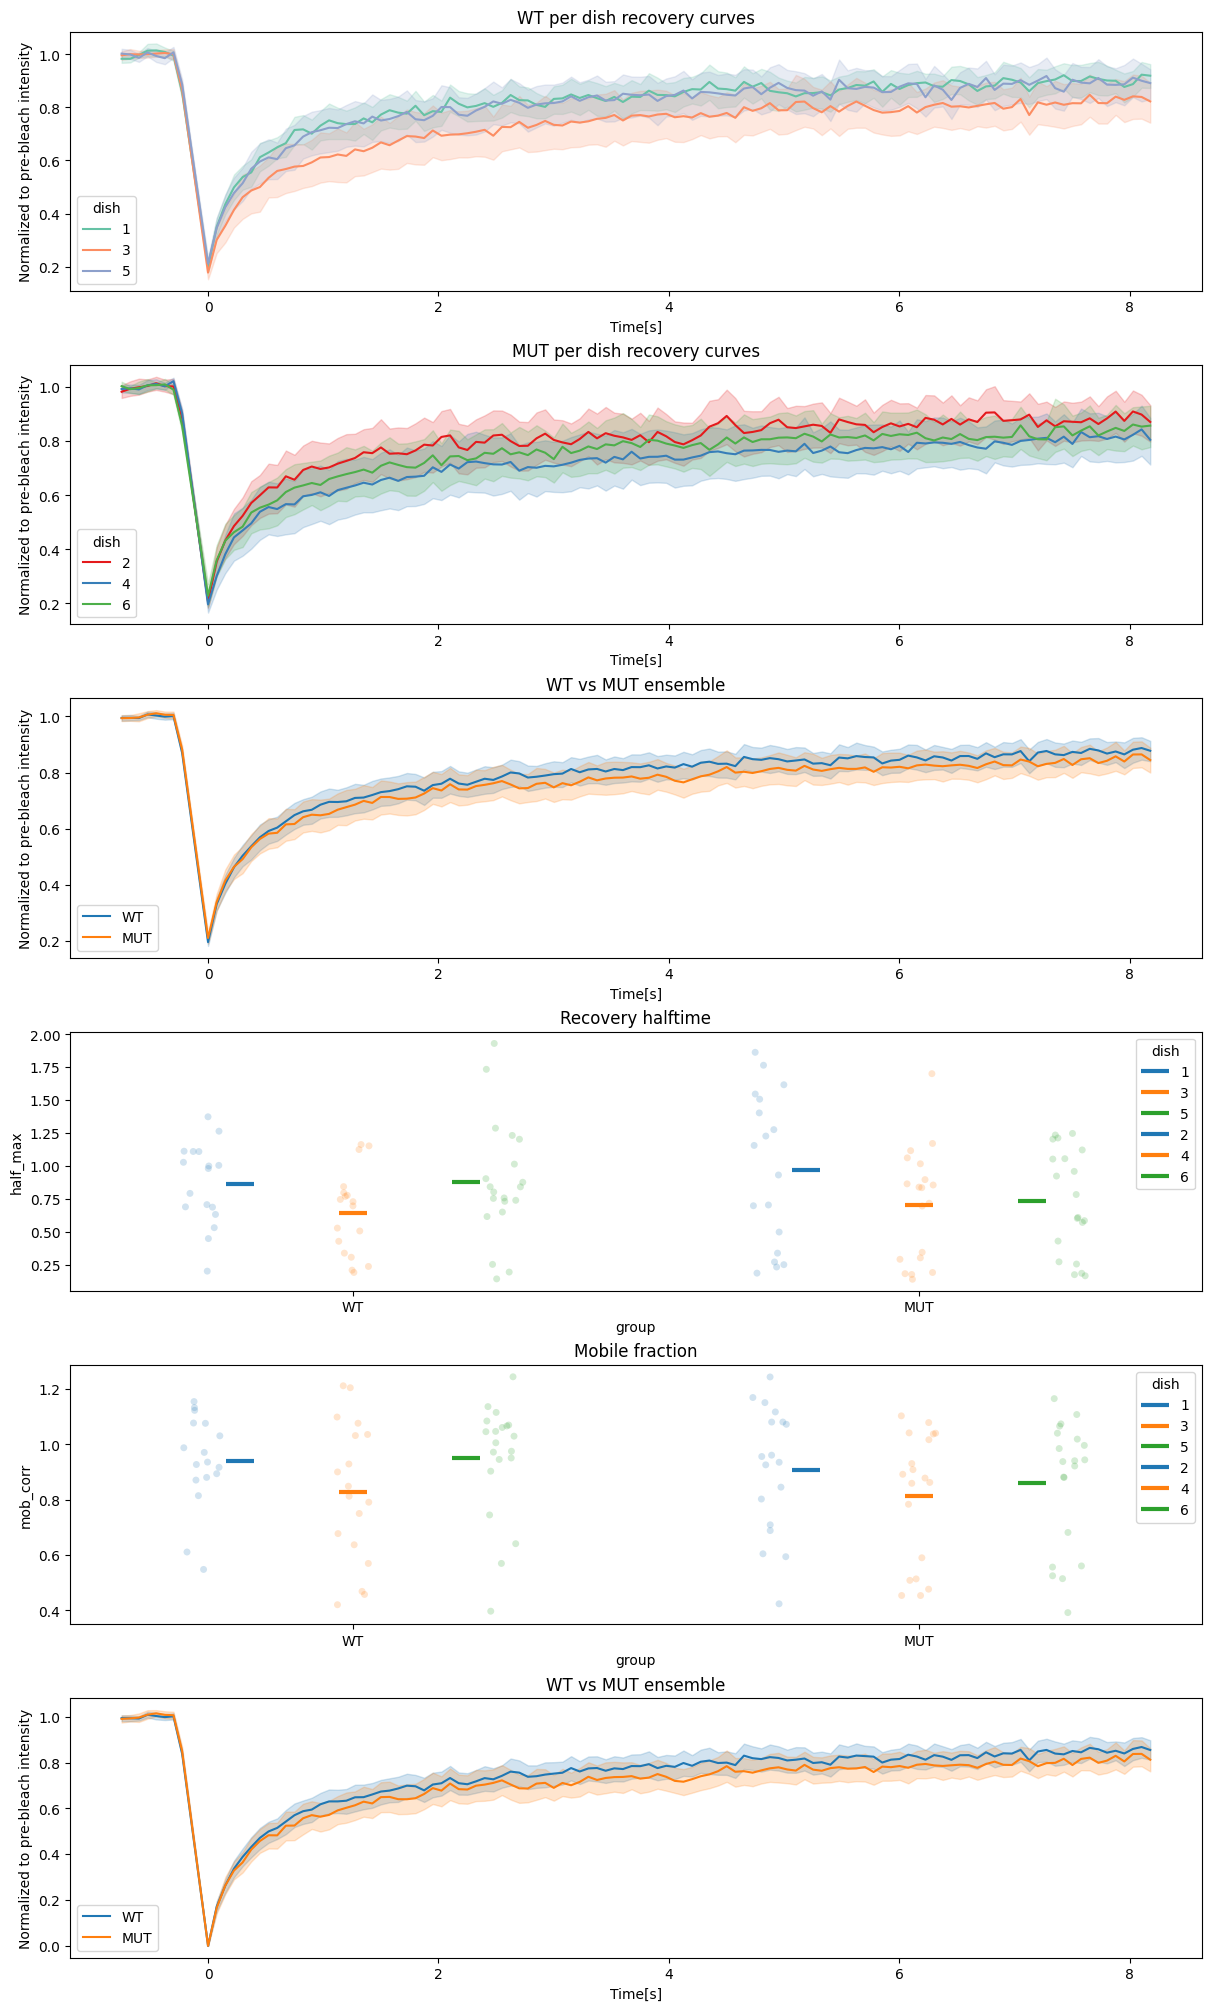

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import os

path = "D:\\Projects\\Shannon\\FRAP analysis\\images\\20250115_MeCP2_FRAP_processed"


fileList = [f for f in os.listdir(os.path.join(path))  if f.endswith('.csv')]

for idx, f in enumerate(fileList):
    if "wt" in f.lower():
        if "roiData" in f:
            wt_dataset_roiData_file = f
        elif  "frap_summary" in f:
            wt_dataset_frap_experiment_file = f    
    elif "mut" in f.lower():
        if "roiData" in f:
            mut_dataset_roiData_file = f
        elif  "frap_summary" in f:
            mut_dataset_frap_experiment_file = f   
    
wt_dataset_roiData = pd.read_csv(os.path.join(path, wt_dataset_roiData_file), index_col=False)
mut_dataset_roiData = pd.read_csv(os.path.join(path, mut_dataset_roiData_file), index_col=False)
wt_dataset_frap_experiment  = pd.read_csv(os.path.join(path, wt_dataset_frap_experiment_file), index_col=False)
mut_dataset_frap_experiment = pd.read_csv(os.path.join(path, mut_dataset_frap_experiment_file), index_col=False)

fig, axes = plt.subplots(6, figsize=(12, 20), constrained_layout=True) 
plt.subplots_adjust(hspace=0.4, bottom=0.2)
sns.lineplot(ax = axes[0], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set2"  )
axes[0].set_title('WT per dish recovery curves')
axes[0].set_ylabel('Normalized to pre-bleach intensity')
axes[0].set_xlabel('Time[s]')
sns.lineplot(ax = axes[1], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', hue = 'dish', palette="Set1" )
axes[1].set_title('MUT per dish recovery curves')
axes[1].set_ylabel('Normalized to pre-bleach intensity')
axes[1].set_xlabel('Time[s]')
sns.lineplot(ax = axes[2], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'WT')
sns.lineplot(ax = axes[2], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_norm_r', label = 'MUT' )
axes[2].set_ylabel('Normalized to pre-bleach intensity')
axes[2].set_xlabel('Time[s]')
axes[2].set_title('WT vs MUT ensemble')
#axes[2].legend(['WT','Mut'])
sns.stripplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[3], data = wt_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
sns.stripplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[3], data = mut_dataset_frap_experiment, x="group", y="half_max", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
axes[3].set_title('Recovery halftime')

sns.stripplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = wt_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
sns.stripplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish",
    dodge=True, alpha=.2, legend=False, palette = sns.color_palette())
sns.pointplot(ax = axes[4], data = mut_dataset_frap_experiment, x="group", y="mob_corr", hue = "dish", 
dodge=.4, linestyle="none", errorbar=None, marker="_", markersize=20, markeredgewidth=3, palette = sns.color_palette())
axes[4].set_title('Mobile fraction')
sns.lineplot(ax = axes[5], data =wt_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'WT')
sns.lineplot(ax = axes[5], data =mut_dataset_roiData, x= 'timestamp_frap_r', y = 'frap_fullscale_norm_r', label = 'MUT' )
axes[5].set_ylabel('Normalized to pre-bleach intensity')
axes[5].set_xlabel('Time[s]')
axes[5].set_title('WT vs MUT ensemble')

